## Action1：数据集：porto seguro safe driver prediction（kaggle 2017年比赛）

    https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data
    Porto Seguro是巴西最大的汽车与住房保险公司之一，根据汽车保单持有人的数据建立机器学习模型，分析该持有人是否会在次年提出索赔。数据已进行脱敏
    使用GBDT+LR模型进行预测，并计算Normalized Cross Entropy


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

In [41]:
X = pd.read_csv('./porto-seguro-safe-driver-prediction/train.csv')
# y = pd.read_csv('./porto-seguro-safe-driver-prediction/test.csv')
# y = y.head(595212)
# len(y)

595212

In [46]:
# 训练集、测试集
X_train, X_test, y_train, y_test = train_test_split(X.drop('target', axis=1), np.array(X['target']), test_size=0.5)
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train, y_train, test_size = 0.5)

In [60]:
n_estimator = 10
# 基于随机森林的监督变换
rf = RandomForestClassifier(max_depth=3, n_estimators = n_estimator)
rf.fit(X_train, y_train)
# 得到OneHot编码
rf_enc = OneHotEncoder(categories = 'auto')
rf_enc.fit(rf.apply(X_train))
# 使用OneHot编码作为特征, 训练LR
rf_lm = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)
# 使用LR进行预测
y_pred_grd_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

In [61]:
# 基于GBDT监督变换
grd = GradientBoostingClassifier(n_estimators = n_estimator)
grd.fit(X_train, y_train)
# 得到OneHot编码
grd_enc = OneHotEncoder(categories = 'auto')

temp = grd.apply(X_train)
np.set_printoptions(threshold = np.inf)
grd_enc.fit(grd.apply(X_train)[: ,: , 0])
# 查看每一列对应的特征
print(grd_enc.get_feature_names()) 

# 直接使用GBDT进行预测
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

['x0_3.0' 'x0_4.0' 'x0_6.0' 'x0_7.0' 'x0_10.0' 'x0_11.0' 'x0_13.0'
 'x0_14.0' 'x1_3.0' 'x1_4.0' 'x1_6.0' 'x1_7.0' 'x1_10.0' 'x1_11.0'
 'x1_13.0' 'x1_14.0' 'x2_3.0' 'x2_4.0' 'x2_6.0' 'x2_7.0' 'x2_10.0'
 'x2_11.0' 'x2_13.0' 'x2_14.0' 'x3_3.0' 'x3_4.0' 'x3_6.0' 'x3_7.0'
 'x3_10.0' 'x3_11.0' 'x3_13.0' 'x3_14.0' 'x4_3.0' 'x4_4.0' 'x4_6.0'
 'x4_7.0' 'x4_10.0' 'x4_11.0' 'x4_13.0' 'x4_14.0' 'x5_3.0' 'x5_4.0'
 'x5_6.0' 'x5_7.0' 'x5_10.0' 'x5_11.0' 'x5_13.0' 'x5_14.0' 'x6_3.0'
 'x6_4.0' 'x6_6.0' 'x6_7.0' 'x6_10.0' 'x6_11.0' 'x6_13.0' 'x6_14.0'
 'x7_3.0' 'x7_4.0' 'x7_6.0' 'x7_7.0' 'x7_10.0' 'x7_11.0' 'x7_13.0'
 'x7_14.0' 'x8_3.0' 'x8_4.0' 'x8_6.0' 'x8_7.0' 'x8_10.0' 'x8_11.0'
 'x8_13.0' 'x8_14.0' 'x9_3.0' 'x9_4.0' 'x9_6.0' 'x9_7.0' 'x9_10.0'
 'x9_11.0' 'x9_13.0' 'x9_14.0']


In [62]:
# 直接使用RF进行预测
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_skl = roc_curve(y_test, y_pred_rf)

In [63]:
# 使用LR进行预测
LR = LogisticRegression(n_jobs=4, C=0.1, penalty='l1', solver='liblinear')
LR.fit(X_train, y_train)
y_pred = LR.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


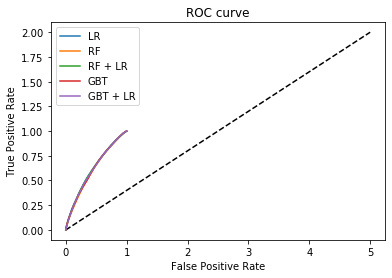

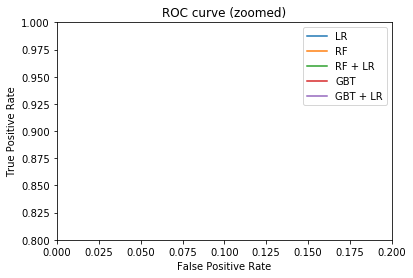

In [66]:

plt.figure(1)
plt.plot([0, 5], [0, 2], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# 将左上角放大显示
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (zoomed)')
plt.legend(loc='best')
plt.show()
